In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import accuracy_score

# CS6340 Project 3 - Deep Learning for Image Classification

By Jack Schlederer

## Download, Load, and Visualize the Data

We'll start by extracting the train-test data from the provided files.

In [48]:
train_images_file = np.load('kmnist-train-imgs.npz')
train_images = train_images_file['arr_0']
train_images_file.close()
train_images.shape

(60000, 28, 28)

In [49]:
train_labels_file = np.load('kmnist-train-labels.npz')
train_labels = train_labels_file['arr_0']
train_labels.shape

(60000,)

In [50]:
test_images_file = np.load('kmnist-test-imgs.npz')
test_images = test_images_file['arr_0']
test_images.shape

(10000, 28, 28)

In [51]:
test_labels_file = np.load('kmnist-test-labels.npz')
test_labels = test_labels_file['arr_0']
test_labels.shape

(10000,)

We'll spot-check the data by visualizing a few of the samples for the first 4 classes.

In [99]:
label_0 = filter(lambda x: x[1] == 0, zip(train_images, train_labels))
label_1 = filter(lambda x: x[1] == 1, zip(train_images, train_labels))
label_2 = filter(lambda x: x[1] == 2, zip(train_images, train_labels))
label_3 = filter(lambda x: x[1] == 3, zip(train_images, train_labels))

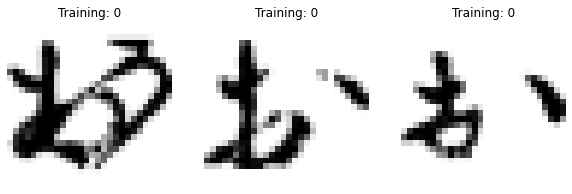

In [100]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 10))
for ax in axes:
    image = next(label_0)
    ax.set_axis_off()
    ax.imshow(image[0], cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % image[1])

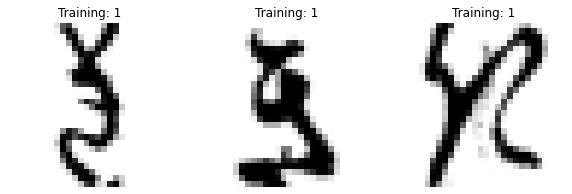

In [101]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 10))
for ax in axes:
    image = next(label_1)
    ax.set_axis_off()
    ax.imshow(image[0], cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % image[1])

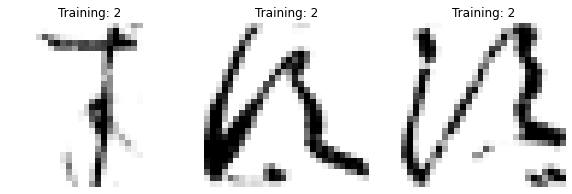

In [102]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 10))
for ax in axes:
    image = next(label_2)
    ax.set_axis_off()
    ax.imshow(image[0], cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % image[1])

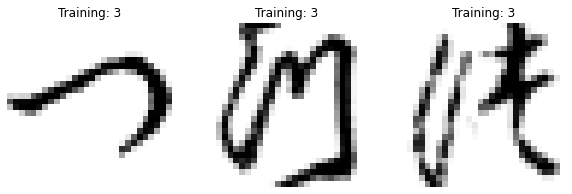

In [103]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 10))
for ax in axes:
    image = next(label_3)
    ax.set_axis_off()
    ax.imshow(image[0], cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % image[1])

## Reshaping the features

We'll flatten the 2D 28 x 28 pixel arrays to 1D 784 pixel arrays. We could use scikit-learn's `StandardScaler` here to scale the values to have a 0 mean and 1 std. deviation, but Keras has a built-in scaler, so we'll include that as part of the deep learning model in the next section.

In [123]:
train_images_flat = train_images.reshape(60000, 28*28)

## Implementing a multi-layer perceptron

Using Keras, we'll build up a simple multi-layer perceptron model with an input layer, a scaling layer, 2 hidden dense layers, and an output dense layer.

In [149]:
# Use a sequential, linear stack of layers
model = tf.keras.Sequential()

# Add an input layer
model.add(tf.keras.layers.InputLayer(input_shape=(28*28,)))

# Add a scaler to scale the [0, 255] values to [0, 1]
model.add(tf.keras.layers.Rescaling(scale=1./255))

# Add 2 dense layers with 8 nodes each, with RELU activation functions
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(8, activation='relu'))

# Add a dense layer with N nodes (N being the number of classes) and a softmax activation function
num_classes = len(set(train_labels))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 8)                 6280      
                                                                 
 dense_7 (Dense)             (None, 8)                 72        
                                                                 
 dense_8 (Dense)             (None, 10)                90        
                                                                 
Total params: 6,442
Trainable params: 6,442
Non-trainable params: 0
_________________________________________________________________


Now, let's compile the model. The `compile` function takes input arguments for the loss function, the optimizer, and additional metrics to calculate along with loss. Since we're classifying with >2 labels and the labels are provided in integer format, we'll use the `SparseCategoricalCrossentropy` loss function. There are several options for the optimizer class, with no immediately apparent advantages or disadvantages over the others, so we'll use the one that was used in the MNIST tutorial, `RMSprop`. As for additional metrics, we'll take `accuracy`, which is more immediately indicative of the model's performance than loss.

In [150]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.RMSprop(),
    metrics=['accuracy']
)

In [151]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 8)                 6280      
                                                                 
 dense_7 (Dense)             (None, 8)                 72        
                                                                 
 dense_8 (Dense)             (None, 10)                90        
                                                                 
Total params: 6,442
Trainable params: 6,442
Non-trainable params: 0
_________________________________________________________________


With a freshly-compiled model, we're ready to train! Fitting a deep learning model has more tunable parameters than a run-of-the-mill ML model, but we'll just be tuning the batch size and number of epochs to train over. For the first run, we'll just use a batch size of the default of 32, and 10 epochs.

In [152]:
history = model.fit(
    x=train_images_flat,
    y=train_labels,
    batch_size=32,
    epochs=10
)

Epoch 1/10
1875/1875 [==============================] - 2s 941us/step - loss: 1.0693 - accuracy: 0.6638
Epoch 2/10
1875/1875 [==============================] - 2s 814us/step - loss: 0.6866 - accuracy: 0.7915
Epoch 3/10
1875/1875 [==============================] - 2s 863us/step - loss: 0.6267 - accuracy: 0.8098
Epoch 4/10
1875/1875 [==============================] - 2s 828us/step - loss: 0.5968 - accuracy: 0.8177
Epoch 5/10
1875/1875 [==============================] - 2s 847us/step - loss: 0.5765 - accuracy: 0.8248
Epoch 6/10
1875/1875 [==============================] - 2s 826us/step - loss: 0.5632 - accuracy: 0.8298
Epoch 7/10
1875/1875 [==============================] - 2s 818us/step - loss: 0.5528 - accuracy: 0.8320
Epoch 8/10
1875/1875 [==============================] - 2s 866us/step - loss: 0.5455 - accuracy: 0.8338
Epoch 9/10
1875/1875 [==============================] - 2s 827us/step - loss: 0.5387 - accuracy: 0.8362
Epoch 10/10
1875/1875 [==============================] - 2s 820u

In [156]:
print(f"Accuracy: {(history.history['accuracy'][-1] * 100):.2f}%")

Accuracy: 83.88%


This is decent accuracy for a first pass, but keep in mind it's only the accuracy of the final pass of _training_. We don't know how it will fare against the testing dataset. Let's play around with some of the parameters. First off, let's "functionize" the creation and training of the model, the predictions, and the accuracy calculation. I want to be able to pass the optimizer, the number of training epochs, the number of hidden dense layers, and the number of nodes in the hidden dense layers as inputs, and get an accuracy score against the testing images as an output.

In [216]:
test_images_flat = test_images.reshape(10000, 28*28)

def compile_fit_model_and_predict(num_epochs, num_hidden_dense_layers, num_dense_layer_nodes, optimizer):
    model = tf.keras.Sequential()

    model.add(tf.keras.layers.InputLayer(input_shape=(28*28,)))
    model.add(tf.keras.layers.Rescaling(scale=1./255))

    for i in range(0, num_hidden_dense_layers):
        model.add(tf.keras.layers.Dense(
            num_dense_layer_nodes, activation='relu'))

    # Add a dense layer with N nodes (N being the number of classes) and a softmax activation function
    num_classes = len(set(train_labels))
    model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

    model.compile(
        loss=tf.keras.losses.SparseCategoricalCrossentropy(),
        optimizer=optimizer,
        metrics=['accuracy']
    )

    model.fit(
        x=train_images_flat,
        y=train_labels,
        batch_size=32,
        epochs=num_epochs,
        verbose=0
    )

    predictions = model.predict(test_images_flat)
    predictions = np.argmax(predictions, axis=1)
    accuracy = accuracy_score(test_labels, predictions)

    return {
        'Number of epochs': num_epochs,
        'Number of hidden layers': num_hidden_dense_layers,
        'Number of nodes per hidden layer': num_dense_layer_nodes,
        'Optimizer class': type(optimizer),
        'Accuracy': accuracy
    }

First off, we'll try changing up the optimizer. It's difficult to tell which optimizer will perform the best just from the documentation, so we'll run a few experiments.

In [217]:
from tensorflow.keras import optimizers as op

optimizers = [
    op.SGD(),
    op.Adam(),
    op.Adadelta(),
    op.Adagrad(),
    op.Adamax(),
    op.Nadam(),
    op.Ftrl()
]

results = list()
for _opt in optimizers:
    results.append(compile_fit_model_and_predict(10, 2, 8, _opt))

In [218]:
pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)

,Number of epochs,Number of hidden layers,Number of nodes per hidden layer,Optimizer class,Accuracy
5,10,2,8,<class 'keras.optimizer_v2.nadam.Nadam'>,0.7034
1,10,2,8,<class 'keras.optimizer_v2.adam.Adam'>,0.7010
4,10,2,8,<class 'keras.optimizer_v2.adamax.Adamax'>,0.6919
0,10,2,8,<class 'keras.optimizer_v2.gradient_descent.SGD'>,0.6743
3,10,2,8,<class 'keras.optimizer_v2.adagrad.Adagrad'>,0.4684
2,10,2,8,<class 'keras.optimizer_v2.adadelta.Adadelta'>,0.1326
6,10,2,8,<class 'keras.optimizer_v2.ftrl.Ftrl'>,0.1000


It looks like the `Adam` and `Nadam` optimizers outperform the others just slightly, at least with the current, fixed set of parameters, so let's stick with `Adam`. Now, let's generate some permutations of the other parameters to build and fit the model with, and then calculate the accuracy of their predictions.

In [219]:
from itertools import product

epochs_options = [25, 50]
hidden_layers_options = [0, 1, 2]
hidden_layer_nodes_options = [32, 64, 128]
optimizer_options = [op.Adam()]

results = list()
for args in product(epochs_options, hidden_layers_options, hidden_layer_nodes_options, optimizer_options):
    results.append(compile_fit_model_and_predict(*args))

For each model, I recorded the accuracy of the predictions. The following table shows the accuracies for each model, with the most accurate on top.

In [222]:
pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)

,Number of epochs,Number of hidden layers,Number of nodes per hidden layer,Optimizer class,Accuracy
8,25,2,128,<class 'keras.optimizer_v2.adam.Adam'>,0.9017
17,50,2,128,<class 'keras.optimizer_v2.adam.Adam'>,0.8974
5,25,1,128,<class 'keras.optimizer_v2.adam.Adam'>,0.8921
14,50,1,128,<class 'keras.optimizer_v2.adam.Adam'>,0.8847
7,25,2,64,<class 'keras.optimizer_v2.adam.Adam'>,0.8808
16,50,2,64,<class 'keras.optimizer_v2.adam.Adam'>,0.8784
4,25,1,64,<class 'keras.optimizer_v2.adam.Adam'>,0.8683
13,50,1,64,<class 'keras.optimizer_v2.adam.Adam'>,0.8629
6,25,2,32,<class 'keras.optimizer_v2.adam.Adam'>,0.8363
15,50,2,32,<class 'keras.optimizer_v2.adam.Adam'>,0.8295


Looks like the most accurate model is built with 2 hidden layers of 128 nodes (or _neurons_) each, and is trained on 25 epochs. Now, let's try the same experiments with a _convolutional_ neural network (CNN).

## Implementing a Convolutional Neural Network

Next up, we'll build a convolutional network using largely the same patterns as the multi-layer network. This time, instead of using the flattened, 1D images as inputs, we'll input the 2D arrays and then flatten after some 2D convolution and pooling layers.

In [232]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.InputLayer(input_shape=(28, 28, 1)))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Flatten())

# use 2 dense layers with 128 nodes, per the most accurate perceptron model from the previous section
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))

num_classes = len(set(train_labels))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=op.Adam(),
    metrics=['accuracy']
)

model.summary()

Model: "sequential_134"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_16 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 9216)              0         
                                                                 
 dense_378 (Dense)           (None, 128)               1179776   
                                                                 
 dense_379 (Dense)           (None, 128)               16512     
                                                    

In [233]:
model.fit(x=train_images, y=train_labels, batch_size=128, epochs=10)

Epoch 1/10
469/469 [==============================] - 72s 151ms/step - loss: 0.9309 - accuracy: 0.8899
Epoch 2/10
469/469 [==============================] - 71s 151ms/step - loss: 0.0818 - accuracy: 0.9759
Epoch 3/10
469/469 [==============================] - 70s 149ms/step - loss: 0.0442 - accuracy: 0.9862
Epoch 4/10
469/469 [==============================] - 71s 151ms/step - loss: 0.0321 - accuracy: 0.9897
Epoch 5/10
469/469 [==============================] - 71s 152ms/step - loss: 0.0222 - accuracy: 0.9929
Epoch 6/10
469/469 [==============================] - 71s 151ms/step - loss: 0.0237 - accuracy: 0.9922
Epoch 7/10
469/469 [==============================] - 71s 150ms/step - loss: 0.0235 - accuracy: 0.9927
Epoch 8/10
469/469 [==============================] - 70s 150ms/step - loss: 0.0151 - accuracy: 0.9952
Epoch 9/10
469/469 [==============================] - 71s 150ms/step - loss: 0.0172 - accuracy: 0.9944
Epoch 10/10
469/469 [==============================] - 70s 149ms/step - l

In [238]:
predictions = model.predict(test_images)
predictions = np.argmax(predictions, axis=1)
accuracy = accuracy_score(test_labels, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9289


Not bad. We're already about 2% better than the perceptron with only the first pass! Since this took a long time to run (11 mins, compared to the perceptrons, which took ~15 sec), I'd like to increase the batch size to see how it impacts time to fit and the accuracy of the predictions.

In [239]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.InputLayer(input_shape=(28, 28, 1)))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Flatten())

# use 2 dense layers with 128 nodes, per the most accurate perceptron model from the previous section
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))

num_classes = len(set(train_labels))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=op.Adam(),
    metrics=['accuracy']
)

model.fit(x=train_images, y=train_labels, batch_size=256, epochs=10)

Epoch 1/10
235/235 [==============================] - 66s 278ms/step - loss: 1.1770 - accuracy: 0.8524
Epoch 2/10
235/235 [==============================] - 65s 275ms/step - loss: 0.0848 - accuracy: 0.9760
Epoch 3/10
235/235 [==============================] - 64s 274ms/step - loss: 0.0423 - accuracy: 0.9877
Epoch 4/10
235/235 [==============================] - 65s 275ms/step - loss: 0.0215 - accuracy: 0.9937
Epoch 5/10
235/235 [==============================] - 65s 277ms/step - loss: 0.0166 - accuracy: 0.9947
Epoch 6/10
235/235 [==============================] - 65s 276ms/step - loss: 0.0131 - accuracy: 0.9956
Epoch 7/10
235/235 [==============================] - 66s 281ms/step - loss: 0.0127 - accuracy: 0.9958
Epoch 8/10
235/235 [==============================] - 66s 281ms/step - loss: 0.0149 - accuracy: 0.9952
Epoch 9/10
235/235 [==============================] - 65s 277ms/step - loss: 0.0126 - accuracy: 0.9960
Epoch 10/10
235/235 [==============================] - 65s 275ms/step - l

In [240]:
predictions = model.predict(test_images)
predictions = np.argmax(predictions, axis=1)
accuracy = accuracy_score(test_labels, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9335


Well, neither the timing nor the accuracy improved, but they also didn't worsen. We'll stick with this one, though. Let's functionize all this such that we can easily pass in different parameters in an attempt to optimize.

In [253]:
from os import cpu_count

def compile_fit_cnn_model_and_predict(num_epochs, num_filters, kernel_size, pooling, optimizer):
    model = tf.keras.Sequential()

    model.add(tf.keras.layers.InputLayer(input_shape=(28, 28, 1)))

    model.add(tf.keras.layers.Conv2D(filters=num_filters, kernel_size=kernel_size, activation='relu'))
    model.add(tf.keras.layers.Conv2D(filters=num_filters*2, kernel_size=kernel_size, activation='relu'))

    if pooling == 'max':
        model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
        model.add(tf.keras.layers.Flatten())
    if pooling == 'global':
        model.add(tf.keras.layers.GlobalMaxPooling2D())
    else:
        model.add(tf.keras.layers.Flatten())

    # use 2 dense layers with 128 nodes, per the most accurate perceptron model from the previous section
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dense(128, activation='relu'))

    num_classes = len(set(train_labels))
    model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

    model.compile(
        loss=tf.keras.losses.SparseCategoricalCrossentropy(),
        optimizer=op.Adam(),
        metrics=['accuracy']
    )

    model.fit(
        x=train_images,
        y=train_labels,
        batch_size=256,
        epochs=num_epochs,
        verbose=0
    )

    predictions = model.predict(test_images)
    predictions = np.argmax(predictions, axis=1)
    accuracy = accuracy_score(test_labels, predictions)

    return {
        'Number of epochs': num_epochs,
        'Number of filters': num_filters,
        'Kernel size': kernel_size,
        'Pooling type': pooling or 'none',
        'Optimizer class': type(optimizer),
        'Accuracy': accuracy
    }

In the interest of time, we'll stick with the `Adam` optimizer to cut down on the number of permutations of the parameters. It's important to keep in mind, however, that varying the optimizer class is yet another dial one could turn to get better timing and/or accuracy of the model. Similarly, we're only going to test a set of 3 options for each of the other parameters so it doesn't take too long.

In [ ]:
epochs_options = [5, 10, 15]
num_filters_options = [16, 32, 64]
kernel_size_options = [3, 5, 7]
pooling_options = ['max', 'global', 'none']
optimizer_options = [op.Adam()]

results = list()
for args in product(epochs_options, num_filters_options, kernel_size_options, pooling_options, optimizer_options):
    results.append(compile_fit_cnn_model_and_predict(*args))

Unfortunately, I had to kill this cell after running for 1,285 minutes, _but_ it had finished predictions on models using 76 of the possible 81 permutations of hyperparameters by that point. Let's take a look at those results.

In [272]:
results_df = pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)
results_df[0:10]

,Number of epochs,Number of filters,Kernel size,Pooling type,Optimizer class,Accuracy
36,10,32,3,max,<class 'keras.optimizer_v2.adam.Adam'>,0.9374
48,10,64,5,max,<class 'keras.optimizer_v2.adam.Adam'>,0.9345
66,15,32,5,max,<class 'keras.optimizer_v2.adam.Adam'>,0.9340
39,10,32,5,max,<class 'keras.optimizer_v2.adam.Adam'>,0.9336
24,5,64,7,max,<class 'keras.optimizer_v2.adam.Adam'>,0.9335
75,15,64,5,max,<class 'keras.optimizer_v2.adam.Adam'>,0.9329
69,15,32,7,max,<class 'keras.optimizer_v2.adam.Adam'>,0.9329
51,10,64,7,max,<class 'keras.optimizer_v2.adam.Adam'>,0.9322
27,10,16,3,max,<class 'keras.optimizer_v2.adam.Adam'>,0.9318
21,5,64,5,max,<class 'keras.optimizer_v2.adam.Adam'>,0.9316


In [275]:
results_df[-10:]

,Number of epochs,Number of filters,Kernel size,Pooling type,Optimizer class,Accuracy
31,10,16,5,global,<class 'keras.optimizer_v2.adam.Adam'>,0.8230
46,10,64,3,global,<class 'keras.optimizer_v2.adam.Adam'>,0.8037
64,15,32,3,global,<class 'keras.optimizer_v2.adam.Adam'>,0.8016
37,10,32,3,global,<class 'keras.optimizer_v2.adam.Adam'>,0.7613
4,5,16,5,global,<class 'keras.optimizer_v2.adam.Adam'>,0.7591
19,5,64,3,global,<class 'keras.optimizer_v2.adam.Adam'>,0.7424
55,15,16,3,global,<class 'keras.optimizer_v2.adam.Adam'>,0.7326
10,5,32,3,global,<class 'keras.optimizer_v2.adam.Adam'>,0.7038
28,10,16,3,global,<class 'keras.optimizer_v2.adam.Adam'>,0.6894
1,5,16,3,global,<class 'keras.optimizer_v2.adam.Adam'>,0.6113


In [281]:
num_models_over_90_pct_accurate = results_df[results_df['Accuracy'] > 0.9].shape[0]
print(f"Percentage of CNN models tested with over 90% accuracy: {(num_models_over_90_pct_accurate / results_df.shape[0] * 100):.2f}%")

Percentage of CNN models tested with over 90% accuracy: 60.53%


The top performing CNN model improved by about 3% over the multi-layer perceptron, and possibly even more if the other 5 permutations were allowed to complete. It's also worth noting that over half of the CNN models tested showed an accuracy of over 90%, where as only 1 of the 18 perceptron models (5.6%) performed that well. The CNN models, however, take an _extreme_ amount of time to run, so only if one has the time to spare, or a particularly beefy computer or cluster thereof, should CNNs be considered.

## Appendix

This section is just for generating outputs to be used in the accompanying report.

In [284]:
def compile_perceptron_model(num_epochs, num_hidden_dense_layers, num_dense_layer_nodes, optimizer):
    model = tf.keras.Sequential()

    model.add(tf.keras.layers.InputLayer(input_shape=(28*28,)))
    model.add(tf.keras.layers.Rescaling(scale=1./255))

    for i in range(0, num_hidden_dense_layers):
        model.add(tf.keras.layers.Dense(
            num_dense_layer_nodes, activation='relu'))

    # Add a dense layer with N nodes (N being the number of classes) and a softmax activation function
    num_classes = len(set(train_labels))
    model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

    model.compile(
        loss=tf.keras.losses.SparseCategoricalCrossentropy(),
        optimizer=optimizer,
        metrics=['accuracy']
    )

    return model

compile_perceptron_model(25, 2, 128, op.Adam()).summary()

Model: "sequential_217"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_124 (Rescaling)   (None, 784)               0         
                                                                 
 dense_627 (Dense)           (None, 128)               100480    
                                                                 
 dense_628 (Dense)           (None, 128)               16512     
                                                                 
 dense_629 (Dense)           (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [286]:
from os import cpu_count

def compile_cnn_model(num_epochs, num_filters, kernel_size, pooling, optimizer):
    model = tf.keras.Sequential()

    model.add(tf.keras.layers.InputLayer(input_shape=(28, 28, 1)))

    model.add(tf.keras.layers.Conv2D(filters=num_filters, kernel_size=kernel_size, activation='relu'))
    model.add(tf.keras.layers.Conv2D(filters=num_filters*2, kernel_size=kernel_size, activation='relu'))

    if pooling == 'max':
        model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
        model.add(tf.keras.layers.Flatten())
    elif pooling == 'global':
        model.add(tf.keras.layers.GlobalMaxPooling2D())
    else:
        model.add(tf.keras.layers.Flatten())

    # use 2 dense layers with 128 nodes, per the most accurate perceptron model from the previous section
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dense(128, activation='relu'))

    num_classes = len(set(train_labels))
    model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

    model.compile(
        loss=tf.keras.losses.SparseCategoricalCrossentropy(),
        optimizer=op.Adam(),
        metrics=['accuracy']
    )

    return model

compile_cnn_model(10, 32, 3, 'max', op.Adam()).summary()

Model: "sequential_219"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_183 (Conv2D)         (None, 26, 26, 32)        320       
                                                                 
 conv2d_184 (Conv2D)         (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 12, 12, 64)       0         
 g2D)                                                            
                                                                 
 flatten_90 (Flatten)        (None, 9216)              0         
                                                                 
 dense_633 (Dense)           (None, 128)               1179776   
                                                                 
 dense_634 (Dense)           (None, 128)               16512     
                                                    

In [288]:
from sklearn.metrics import confusion_matrix
test_images_flat = test_images.reshape(10000, 28*28)

def compile_fit_model_and_predict_with_confusion_matrix(num_epochs, num_hidden_dense_layers, num_dense_layer_nodes, optimizer):
    model = tf.keras.Sequential()

    model.add(tf.keras.layers.InputLayer(input_shape=(28*28,)))
    model.add(tf.keras.layers.Rescaling(scale=1./255))

    for i in range(0, num_hidden_dense_layers):
        model.add(tf.keras.layers.Dense(
            num_dense_layer_nodes, activation='relu'))

    # Add a dense layer with N nodes (N being the number of classes) and a softmax activation function
    num_classes = len(set(train_labels))
    model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

    model.compile(
        loss=tf.keras.losses.SparseCategoricalCrossentropy(),
        optimizer=optimizer,
        metrics=['accuracy']
    )

    model.fit(
        x=train_images_flat,
        y=train_labels,
        batch_size=32,
        epochs=num_epochs
    )

    predictions = model.predict(test_images_flat)
    predictions = np.argmax(predictions, axis=1)

    return confusion_matrix(test_labels, predictions)

compile_fit_model_and_predict_with_confusion_matrix(25, 2, 128, op.Adam())

Epoch 1/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3707 - accuracy: 0.8871
Epoch 2/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1727 - accuracy: 0.9484
Epoch 3/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1191 - accuracy: 0.9641
Epoch 4/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0883 - accuracy: 0.9723
Epoch 5/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0676 - accuracy: 0.9783
Epoch 6/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0538 - accuracy: 0.9827
Epoch 7/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0442 - accuracy: 0.9856
Epoch 8/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0353 - accuracy: 0.9882
Epoch 9/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0328 - accuracy: 0.9890
Epoch 10/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.027

array([[929,   1,   1,   2,  23,  12,   5,  14,   9,   4],
       [  2, 882,  22,   3,  15,  14,  29,   4,  14,  15],
       [  8,   6, 847,  40,   6,  41,  13,  11,  15,  13],
       [  3,   4,  16, 952,   2,  10,   4,   2,   5,   2],
       [ 14,  18,   4,  10, 899,   7,   9,  10,  24,   5],
       [  4,  12,  15,   9,   6, 941,   5,   1,   4,   3],
       [  7,   9,  14,   6,  28,   9, 919,   4,   2,   2],
       [ 16,  10,  14,   8,  22,  10,  19, 868,  13,  20],
       [ 10,  12,   8,  18,   7,  10,  10,   1, 921,   3],
       [ 13,   8,  32,   7,  32,   8,   9,   6,  19, 866]], dtype=int64)

In [289]:
def compile_fit_cnn_model_and_predict_with_confusion_matrix(num_epochs, num_filters, kernel_size, pooling, optimizer):
    model = tf.keras.Sequential()

    model.add(tf.keras.layers.InputLayer(input_shape=(28, 28, 1)))

    model.add(tf.keras.layers.Conv2D(filters=num_filters, kernel_size=kernel_size, activation='relu'))
    model.add(tf.keras.layers.Conv2D(filters=num_filters*2, kernel_size=kernel_size, activation='relu'))

    if pooling == 'max':
        model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
        model.add(tf.keras.layers.Flatten())
    if pooling == 'global':
        model.add(tf.keras.layers.GlobalMaxPooling2D())
    else:
        model.add(tf.keras.layers.Flatten())

    # use 2 dense layers with 128 nodes, per the most accurate perceptron model from the previous section
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dense(128, activation='relu'))

    num_classes = len(set(train_labels))
    model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

    model.compile(
        loss=tf.keras.losses.SparseCategoricalCrossentropy(),
        optimizer=op.Adam(),
        metrics=['accuracy']
    )

    model.fit(
        x=train_images,
        y=train_labels,
        batch_size=256,
        epochs=num_epochs
    )

    predictions = model.predict(test_images)
    predictions = np.argmax(predictions, axis=1)

    return confusion_matrix(test_labels, predictions)

compile_fit_cnn_model_and_predict_with_confusion_matrix(10, 32, 3, 'max', op.Adam())

Epoch 1/10
235/235 [==============================] - 66s 276ms/step - loss: 1.6551 - accuracy: 0.7995
Epoch 2/10
235/235 [==============================] - 65s 276ms/step - loss: 0.1150 - accuracy: 0.9657
Epoch 3/10
235/235 [==============================] - 68s 291ms/step - loss: 0.0612 - accuracy: 0.9818
Epoch 4/10
235/235 [==============================] - 66s 283ms/step - loss: 0.0332 - accuracy: 0.9898
Epoch 5/10
235/235 [==============================] - 64s 274ms/step - loss: 0.0209 - accuracy: 0.9934
Epoch 6/10
235/235 [==============================] - 64s 273ms/step - loss: 0.0164 - accuracy: 0.9945
Epoch 7/10
235/235 [==============================] - 64s 273ms/step - loss: 0.0141 - accuracy: 0.9953
Epoch 8/10
235/235 [==============================] - 64s 273ms/step - loss: 0.0171 - accuracy: 0.9937
Epoch 9/10
235/235 [==============================] - 69s 294ms/step - loss: 0.0164 - accuracy: 0.9942
Epoch 10/10
235/235 [==============================] - 67s 284ms/step - l

array([[959,   2,   0,   0,   8,   3,   0,  17,   8,   3],
       [  2, 939,   4,   0,   6,   4,  31,   3,   4,   7],
       [  8,   7, 842,  38,   9,  24,  28,  22,  15,   7],
       [  3,   2,   5, 966,   0,  11,   4,   3,   4,   2],
       [ 23,   3,   5,  14, 887,  14,  14,  11,  28,   1],
       [  2,   6,  25,  10,   3, 934,  12,   3,   2,   3],
       [  3,  16,   8,   4,   3,   2, 954,   8,   2,   0],
       [ 10,   9,   1,   2,   4,   3,  10, 944,   6,  11],
       [  8,  15,   4,   4,   2,   0,   7,   3, 956,   1],
       [ 16,  11,   8,   3,  12,   4,   5,  14,  10, 917]], dtype=int64)

In [290]:
test_label_2 = filter(lambda x: x[1] == 2, zip(test_images, test_labels))
test_label_3 = filter(lambda x: x[1] == 3, zip(test_images, test_labels))

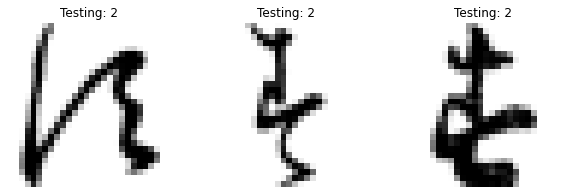

In [295]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 10))
for ax in axes:
    image = next(test_label_2)
    ax.set_axis_off()
    ax.imshow(image[0], cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Testing: %i' % image[1])

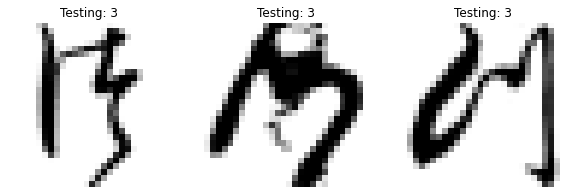

In [296]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 10))
for ax in axes:
    image = next(test_label_3)
    ax.set_axis_off()
    ax.imshow(image[0], cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Testing: %i' % image[1])